# Wizualizacja określająca ilość wypadków z podziałem na dni tygodnia

In [1]:
import sqlite3
import numpy
import matplotlib.pyplot as plt

import pandas as pd
import requests

## Wczytanie danych z pliku CSV

In [2]:
nypd_df = pd.read_csv("/home/student/PythonDeveloper/pythonProject/Projekt_Pandas/data/nypd-motor-vehicle-collisions(1).csv")
nypd_df

/tmp/ipykernel_3393/1311525886.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  nypd_df = pd.read_csv("/home/student/PythonDeveloper/pythonProject/Projekt_Pandas/data/nypd-motor-vehicle-collisions(1).csv")


,ACCIDENT DATE,ACCIDENT TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2019-08-05T00:00:00.000,16:30,QUEENS,11434.0,40.676052,-73.790184,"{'type': 'Point', 'coordinates': [-73.790184, ...",NaN,NaN,150-08 123 AVENUE,...,Unspecified,NaN,NaN,NaN,4184637,Sedan,Pick-up Truck,NaN,NaN,NaN
1,2019-08-27T00:00:00.000,16:02,BROOKLYN,11225.0,40.657780,-73.951096,"{'type': 'Point', 'coordinates': [-73.951096, ...",NaN,NaN,288 HAWTHORNE STREET,...,Unspecified,NaN,NaN,NaN,4195773,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2,2019-08-15T00:00:00.000,17:57,MANHATTAN,10002.0,40.718143,-73.993835,"{'type': 'Point', 'coordinates': [-73.993835, ...",CHRYSTIE STREET,GRAND STREET,NaN,...,NaN,NaN,NaN,NaN,4202457,Sedan,NaN,NaN,NaN,NaN
3,2019-08-30T00:00:00.000,21:53,BRONX,10460.0,40.840534,-73.866610,"{'type': 'Point', 'coordinates': [-73.86661, 4...",NaN,NaN,1837 EAST TREMONT AVENUE,...,Unspecified,NaN,NaN,NaN,4198749,Taxi,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,2019-08-06T00:00:00.000,9:45,MANHATTAN,10016.0,40.745440,-73.975400,"{'type': 'Point', 'coordinates': [-73.9754, 40...",EAST 35 STREET,2 AVENUE,NaN,...,Driver Inattention/Distraction,NaN,NaN,NaN,4183798,Station Wagon/Sport Utility Vehicle,Bike,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1612173,2012-07-21T00:00:00.000,22:46,BROOKLYN,11226.0,40.651741,-73.965241,"{'type': 'Point', 'coordinates': [-73.9652409,...",PARADE PLACE,CROOKE AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,147595,SPORT UTILITY / STATION WAGON,UNKNOWN,NaN,NaN,NaN
1612174,2012-07-09T00:00:00.000,16:45,NaN,NaN,NaN,NaN,NaN,EDWARD L GRANT HIGHWAY,WEST 169 STREET,NaN,...,Fatigued/Drowsy,Unspecified,NaN,NaN,85220,PASSENGER VEHICLE,LIVERY VEHICLE,PASSENGER VEHICLE,NaN,NaN
1612175,2012-07-09T00:00:00.000,14:35,NaN,NaN,40.791492,-73.935763,"{'type': 'Point', 'coordinates': [-73.935763, ...",NaN,NaN,NaN,...,Unspecified,NaN,NaN,NaN,2853431,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
1612176,2012-07-18T00:00:00.000,9:20,MANHATTAN,10024.0,40.779479,-73.973573,"{'type': 'Point', 'coordinates': [-73.9735729,...",CENTRAL PARK WEST,WEST 77 STREET,NaN,...,Unspecified,Unspecified,NaN,NaN,52405,SPORT UTILITY / STATION WAGON,VAN,BUS,NaN,NaN


##### Tabela zawierająca wszystkie dane wejściowe

In [3]:
nypd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1612178 entries, 0 to 1612177
Data columns (total 29 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   ACCIDENT DATE                  1612178 non-null  object 
 1   ACCIDENT TIME                  1612178 non-null  object 
 2   BOROUGH                        1127553 non-null  object 
 3   ZIP CODE                       1127376 non-null  object 
 4   LATITUDE                       1415893 non-null  float64
 5   LONGITUDE                      1415893 non-null  float64
 6   LOCATION                       1415893 non-null  object 
 7   ON STREET NAME                 1298002 non-null  object 
 8   CROSS STREET NAME              1079193 non-null  object 
 9   OFF STREET NAME                219732 non-null   object 
 10  NUMBER OF PERSONS INJURED      1612161 non-null  float64
 11  NUMBER OF PERSONS KILLED       1612145 non-null  float64
 12  NUMBER OF PEDE

##### Informacje na temat otrzymanego datasetu

## Uzyskanie tabeli z danymi potrzebnymi do dalszej analizy

In [8]:
nypd_date= nypd_df[['ACCIDENT DATE', 'COLLISION_ID']]
nypd_date

,ACCIDENT DATE,COLLISION_ID
0,2019-08-05T00:00:00.000,4184637
1,2019-08-27T00:00:00.000,4195773
2,2019-08-15T00:00:00.000,4202457
3,2019-08-30T00:00:00.000,4198749
4,2019-08-06T00:00:00.000,4183798
...,...,...
1612173,2012-07-21T00:00:00.000,147595
1612174,2012-07-09T00:00:00.000,85220
1612175,2012-07-09T00:00:00.000,2853431
1612176,2012-07-18T00:00:00.000,52405


##### Tabela z datami oraz ID wypadków 

In [11]:
nypd_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1612178 entries, 0 to 1612177
Data columns (total 2 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   ACCIDENT DATE  1612178 non-null  object
 1   COLLISION_ID   1612178 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 24.6+ MB


##### Informacje na temat tabeli na której bedziemy przeprowadzać analizę danych

## Usunięcie duplikatów w COLLISION_ID oraz Nan

In [16]:
nypd_date_clean = nypd_date.drop_duplicates(subset=['COLLISION_ID'])
nypd_date_clean

,ACCIDENT DATE,COLLISION_ID
0,2019-08-05T00:00:00.000,4184637
1,2019-08-27T00:00:00.000,4195773
2,2019-08-15T00:00:00.000,4202457
3,2019-08-30T00:00:00.000,4198749
4,2019-08-06T00:00:00.000,4183798
...,...,...
1611230,2012-07-17T00:00:00.000,228073
1611231,2012-07-19T00:00:00.000,213366
1611232,2012-07-03T00:00:00.000,2964854
1611233,2012-07-11T00:00:00.000,147655


##### Tabela z usuniętymi duplikatami w ID wypadków co zapobiega ponownej analizie tych samych wypadków

In [18]:
nypd_date_clean_nan = nypd_date_clean.dropna()
nypd_date_clean_nan

,ACCIDENT DATE,COLLISION_ID
0,2019-08-05T00:00:00.000,4184637
1,2019-08-27T00:00:00.000,4195773
2,2019-08-15T00:00:00.000,4202457
3,2019-08-30T00:00:00.000,4198749
4,2019-08-06T00:00:00.000,4183798
...,...,...
1611230,2012-07-17T00:00:00.000,228073
1611231,2012-07-19T00:00:00.000,213366
1611232,2012-07-03T00:00:00.000,2964854
1611233,2012-07-11T00:00:00.000,147655


##### Tabela przedstawia oczyszczone dane z komórek bez wartości w calej tabeli oraz z duplikatów w COLLISION_ID

In [19]:
nypd_date_clean_nan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1217957 entries, 0 to 1612019
Data columns (total 2 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   ACCIDENT DATE  1217957 non-null  object
 1   COLLISION_ID   1217957 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 27.9+ MB


##### Informacje na temat danych po oczyszczaniu. Po usunięciu duplikatow otrzymaliśmy mniej rekordów do analizy. 

## Zmiana formatu daty

In [20]:
nypd_date_clean_nan['ACCIDENT DATE'] = pd.to_datetime(nypd_date_clean_nan['ACCIDENT DATE'], errors='coerce')
nypd_date_clean_nan

,ACCIDENT DATE,COLLISION_ID
0,2019-08-05,4184637
1,2019-08-27,4195773
2,2019-08-15,4202457
3,2019-08-30,4198749
4,2019-08-06,4183798
...,...,...
1611230,2012-07-17,228073
1611231,2012-07-19,213366
1611232,2012-07-03,2964854
1611233,2012-07-11,147655


##### Tabela ze zmienionym formatem daty 

## Zamiana dat na dni tygodnia

In [21]:
nypd_days=nypd_date_clean_nan['ACCIDENT DATE'].dt.day_name()
nypd_days

0             Monday
1            Tuesday
2           Thursday
3             Friday
4            Tuesday
             ...    
1611230      Tuesday
1611231     Thursday
1611232      Tuesday
1611233    Wednesday
1612019       Friday
Name: ACCIDENT DATE, Length: 1217957, dtype: object

##### Seria z dniami tygodnia uzyskanymi na podstawie dat z powyższej tabeli

## Zsumowanie ile razy występuje dany dzień tygodnia 

In [28]:
nypd_numbers= nypd_days.value_counts()
nypd_numbers

ACCIDENT DATE
Friday       193830
Thursday     183179
Tuesday      180997
Wednesday    178528
Monday       175041
Saturday     162646
Sunday       143736
Name: count, dtype: int64

##### Określenie, ile razy dany dzień tygodnia powtarzał się w otrzymanych danych

## Przekształcenie serii w tabelę oraz nadanie indeksu

In [23]:
df_nypd_numbers = pd.DataFrame(nypd_numbers)
df_nypd_numbers=df_nypd_numbers.reset_index()
df_nypd_numbers

,ACCIDENT DATE,count
0,Friday,193830
1,Thursday,183179
2,Tuesday,180997
3,Wednesday,178528
4,Monday,175041
5,Saturday,162646
6,Sunday,143736


##### Poprzednie dane przedstawione w formie tabeli w celu wykonania wizualizacji w kolejnych krokach

## Nadanie innych nazw kolumn

In [24]:
df_nypd_numbers = df_nypd_numbers.rename(columns={'ACCIDENT DATE': 'NAME DAY','count':'AMOUNT' })
df_nypd_numbers

,NAME DAY,AMOUNT
0,Friday,193830
1,Thursday,183179
2,Tuesday,180997
3,Wednesday,178528
4,Monday,175041
5,Saturday,162646
6,Sunday,143736


##### Tabela z nowymi nazwami kolumn

## Utworzenie wykresu słupkowego

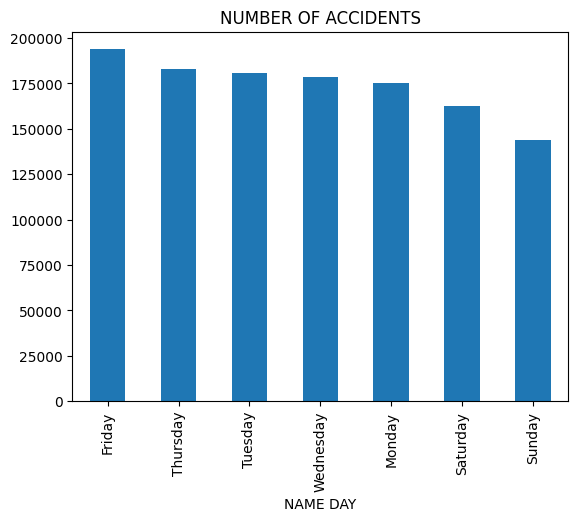

In [29]:
df_nypd_numbers_bar = df_nypd_numbers.plot.bar(x='NAME DAY', y='AMOUNT',title='NUMBER OF ACCIDENTS', legend=False)

##### Prezentacja otrzymanych wyników w postaci wykresu słupkowego

## Utworzenie wykresu kołowego

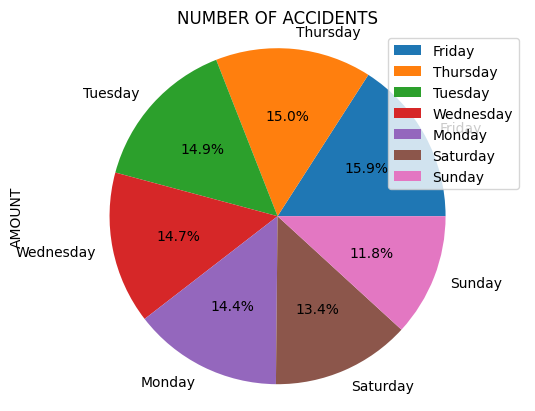

In [30]:
df_nypd_numbers.plot.pie(y='AMOUNT', labels=df_nypd_numbers['NAME DAY'], autopct='%1.1f%%')
plt.title('NUMBER OF ACCIDENTS')
plt.axis('equal')
plt.show()

##### Prezentacja otrzymanych wyników w postaci wykresu kołowego wraz z wartościami procentowymi

# Podsumowanie:
## Po oczyszczeniu danych i przeprowadzonej analizie możemy wnioskować, że najwięcej wypadków samochodowych w Nowym Yorku wystepowało w piątki, najmniej w niedziele. 
## Za pomocą wykresu kołowego możemy również stwierdzić, ile procent wypadków występowało w danym dniu tygodnia. Wartość ta dla piątku wynosi 15,9 %, dla niedzieli 11,8 %.